In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<function matplotlib.pyplot.show(*args, **kw)>

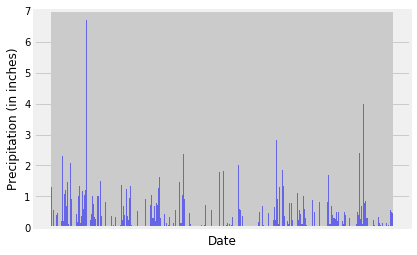

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Calculate the date 1 year ago from the last data point in the database
prcp_data = pd.read_sql("SELECT date, prcp FROM Measurement WHERE id >= (SELECT max(id)-365 FROM Measurement)",con=engine)

# Use Pandas Plotting with Matplotlib to plot the data
ax = plt.axes()
date = prcp_data["date"].values
rainfall = prcp_data["prcp"].values
plt.ylabel("Precipitation (in inches)")
plt.xlabel("Date")
ax.xaxis.set_major_formatter(plt.NullFormatter())

plt.bar(date, rainfall, color='b', alpha=0.5, align="center")
plt.show

![precipitation](Images/precipitation.png)

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_data.describe()

,prcp
count,344.000000
mean,0.460494
std,0.713201
min,0.000000
25%,0.010000
50%,0.215000
75%,0.657500
max,6.700000


![describe](Images/describe.png)

In [12]:
# Design a query to show how many stations are available in this dataset?
station_count = pd.read_sql("SELECT count(station) FROM Station",con=engine)
print(station_count)

   count(station)
0               9


In [13]:
station_info = pd.read_sql("SELECT date, tobs FROM Measurement WHERE station = 'USC00519281' ORDER BY date DESC LIMIT 365", con=engine)
station_info.head()

,date,tobs
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_details = pd.read_sql("SELECT station, count(id) FROM Measurement GROUP BY station ORDER BY count(id) DESC", con=engine)
station_details.head(9)

,station,count(id)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
active_station = pd.read_sql("SELECT station, MAX(tobs), MIN(tobs), AVG(tobs) FROM Measurement WHERE station == 'USC00519281'", con=engine)
active_station.head()

,station,MAX(tobs),MIN(tobs),AVG(tobs)
0,USC00519281,85.0,54.0,71.663781


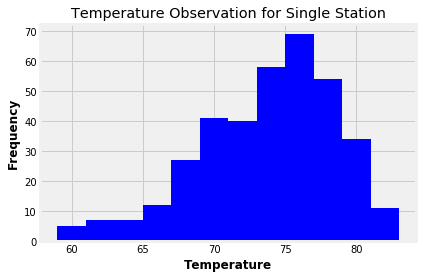

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_info = pd.read_sql("SELECT date, tobs FROM Measurement WHERE station = 'USC00519281' ORDER BY date DESC LIMIT 365", con=engine)

# Use Pandas Plotting with Matplotlib to plot the data
temp = station_info["tobs"].values

plt.hist(temp, bins=12, color='b')
plt.title("Temperature Observation for Single Station")
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')
labels = ['tobs']

In [17]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [18]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
my_vacay = calc_temps('2017-06-30', '2017-07-07')

print(my_vacay)

[(74.0, 77.80851063829788, 87.0)]


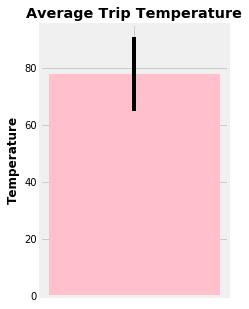

In [19]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

avg_temp = 77.80851
tmax = 87.0
tmin = 74.0

plt.figure(figsize=(3,5))
plt.bar(1, avg_temp, yerr=(tmax - tmin), tick_label='', color='pink')
plt.ylabel("Temperature", weight="bold")
plt.title("Average Trip Temperature", weight="bold")
plt.show()

In [20]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
table1 = pd.read_sql("SELECT Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp FROM Station INNER JOIN Measurement ON Station.station = Measurement.station GROUP BY Station.station ORDER BY Measurement.prcp DESC",con=engine)
table1.head(10)

,station,name,latitude,longitude,elevation,prcp
0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,11.53
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,9.64
2,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,8.06
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,7.65
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,6.38
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,6.30
6,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,4.20
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,4.00
8,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,2.80
